In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier, Lattice
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/top_obstruction


In [2]:
# tight-binding parameters
delta = 1
# # checkerboard
# t0 = 0.4
# tprime = 0.5
# Haldane
t = -1
t2 = 0.4

n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
# model = models.chessboard(t0, tprime, delta).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
model.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 8
number of electronic states = 8
lattice vectors:
 #  0  ===>  [     2.0 ,     0.0 ]
 #  1  ===>  [     1.0 ,  1.7321 ]
positions of orbitals:
 #  0  ===>  [  0.1667 ,  0.1667 ]
 #  1  ===>  [  0.3333 ,  0.3333 ]
 #  2  ===>  [  0.1667 ,  0.6667 ]
 #  3  ===>  [  0.3333 ,  0.8333 ]
 #  4  ===>  [  0.6667 ,  0.1667 ]
 #  5  ===>  [  0.8333 ,  0.3333 ]
 #  6  ===>  [  0.6667 ,  0.6667 ]
 #  7  ===>  [  0.8333 ,  0.8333 ]
site energies:
 #  0  ===>      -1.0
 #  1  ===>       1.0
 #  2  ===>      -1.0
 #  3  ===>       1.0
 #  4  ===>      -1.0
 #  5  ===>       1.0
 #  6  ===>      -1.0
 #  7  ===>       1.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ] >     ===>     -1.0 +     0.0 i
<  0 | H |  5 + [ -1 ,  0 ] >     ===>    

In [3]:
low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern_occ = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)
chern_cond = u_wfs_full.berry_flux([i for i in range(n_occ, n_orb)])/(2*np.pi)

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern_occ: .1f}")
print(f"Chern # conduction: {chern_cond: .1f}")

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern # occupied: -1.0
Chern # conduction:  1.0


In [9]:
random = True
low_E = False

if random:
    omit_num = 1
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
else:
    omit_sites = 6
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
if low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

# of Wannier functions: 3
# of occupied bands: 4
Wannier fraction: 0.75


In [10]:
nks = 20, 20
WF = Wannier(model, nks)

In [11]:
WF.single_shot(tf_list)

In [12]:
WF.report()

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.60478
w_1 --> 1.0038
w_2 --> 0.78225
Centers:
w_0 --> [0.57444 0.61456]
w_1 --> [0.55996 0.24125]
w_2 --> [0.42393 0.1848 ]
Omega_i = 1.4197461860540272
Omega_tilde = 0.971075450884579


([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

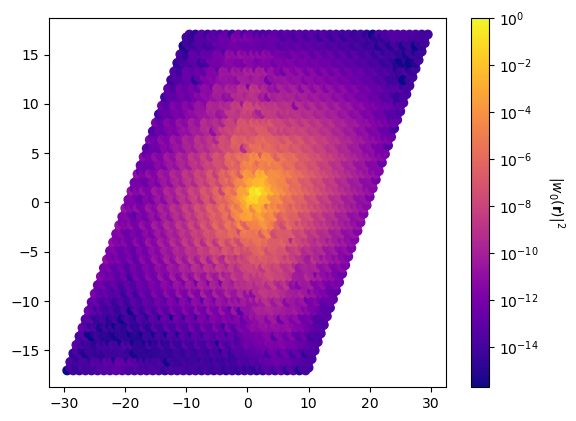

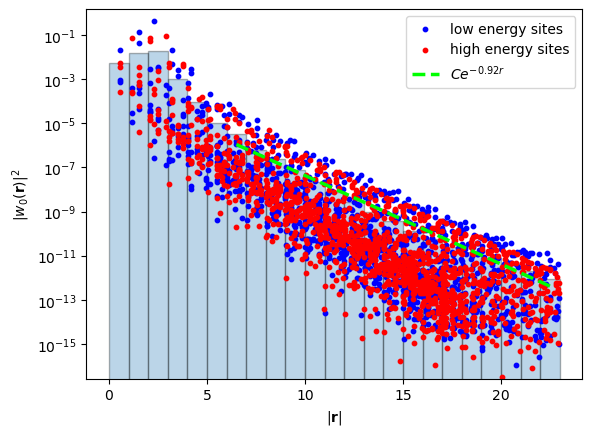

In [13]:
WF.plot(0, plot_decay=True)

In [14]:
WF.max_loc(verbose=True, iter_num_omega_i=20000, iter_num_omega_til=40000)

0 eigvals[0,0]: [ 0.52135391 60.00720098 60.41999955 60.77583635]
0 Omega_I: 1.3691620993918296
1 eigvals[0,0]: [ 0.55932416 59.96840798 60.41902785 60.77802992]
1 Omega_I: 1.3257524765459174
2 eigvals[0,0]: [ 0.59598152 59.93097912 60.41828717 60.77991322]
2 Omega_I: 1.2872575928266254
3 eigvals[0,0]: [ 0.62803373 59.89830909 60.41773224 60.78141119]
3 Omega_I: 1.2525247509517048
4 eigvals[0,0]: [ 0.6539066  59.87206173 60.4172872  60.78250324]
4 Omega_I: 1.2208412330094816
5 eigvals[0,0]: [ 0.67399137 59.85181918 60.41692909 60.78324424]
5 Omega_I: 1.1917213443251145
6 eigvals[0,0]: [ 0.68893551 59.83687342 60.41665066 60.78370878]
6 Omega_I: 1.1648119063994216
7 eigvals[0,0]: [ 0.69948114 59.82643373 60.41644101 60.78396295]
7 Omega_I: 1.1398434833234483
8 eigvals[0,0]: [ 0.70631011 59.81977905 60.41629078 60.78406096]
8 Omega_I: 1.1166027188441636
9 eigvals[0,0]: [ 0.71003026 59.81627406 60.41619002 60.78404495]
9 Omega_I: 1.0949155589244801
10 eigvals[0,0]: [ 0.71116541 59.8153753

([<Figure size 640x480 with 2 Axes>, <Figure size 640x480 with 1 Axes>],
 [<Axes: >, <Axes: xlabel='$|\\mathbf{r}|$', ylabel='$|w_0(\\mathbf{r})|^2$'>])

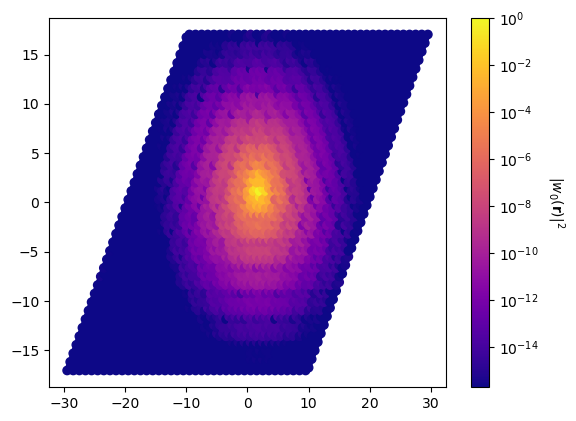

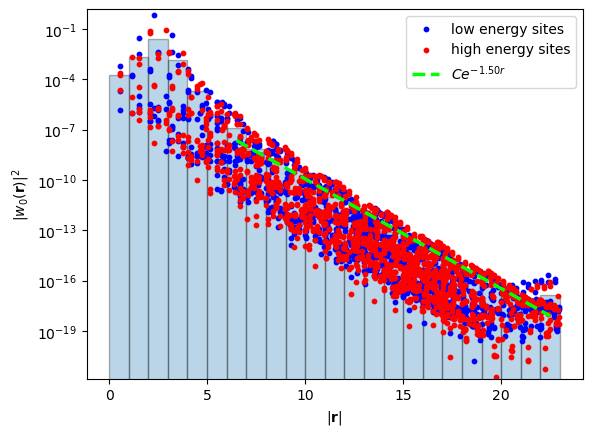

In [15]:
WF.plot(0, plot_decay=True)

In [16]:
WF.report()

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.23454
w_1 --> 0.23472
w_2 --> 0.23427
Centers:
w_0 --> [0.6733  0.67953]
w_1 --> [0.66164 0.15937]
w_2 --> [0.17955 0.17214]
Omega_i = 0.657837027608764
Omega_tilde = 0.045697118633356244


In [35]:
WF.Lattice.get_orb(Cartesian=False)

array([[0.16666667, 0.16666667],
       [0.33333333, 0.33333333],
       [0.16666667, 0.66666667],
       [0.33333333, 0.83333333],
       [0.66666667, 0.16666667],
       [0.83333333, 0.33333333],
       [0.66666667, 0.66666667],
       [0.83333333, 0.83333333]])

In [17]:
WF.trial_wfs

array([[ 0.03018383+0.j,  0.34856807+0.j,  0.15622642+0.j,
         0.10737843+0.j,  0.15975443+0.j,  0.03850718+0.j,
         0.43839472+0.j,  0.23832963+0.j],
       [ 0.37097588+0.j, -0.07984418+0.j, -0.00247082+0.j,
         0.36983724+0.j,  0.37047178+0.j,  0.00990881+0.j,
        -0.2135925 +0.j,  0.04774428+0.j],
       [-0.29862819+0.j, -0.42020313+0.j,  0.09111879+0.j,
        -0.04815105+0.j,  0.32623263+0.j, -0.06380724+0.j,
         0.14712223+0.j,  0.13536159+0.j]])

In [18]:
save_name = f'C={chern_occ:.1f}_Delta={delta}_t={t}_t2={t2}'

if random:
    save_name += '_tfxs=rand'
else:
    save_name += f'_tfx={tf_list}'
save_name

'C=-1.0_Delta=1_t=-1_t2=0.4_tfxs=rand'

In [19]:
sv_dir = 'data'
if not os.path.exists(sv_dir):
    os.makedirs(sv_dir)
sv_prefix = 'WF_max_loc'
np.save(f"{sv_dir}/{sv_prefix}_{save_name}", WF)